### **Seoul Bike Sharing Demand**
_**`Objective:`**_ The primary goal of the Seoul Bike Sharing Demand project is to estimate the number of rental bikes required per hour to ensure an ongoing supply in urban areas. This forecast is made using weather data (temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, and rainfall) as well as date information. By correctly assessing demand for rental bikes, we seek to optimise their availability and accessibility to the general public, reducing wait times and enhancing mobility comfort in cities.

***`Additional information: `*** Cited by Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import copy

#### __Read Data__

In [2]:
path_dir = os.getcwd() # path directory
file_path = os.path.join(path_dir, r'demand data\SeoulBikeData.csv') #file path name
data = pd.read_csv(file_path, encoding='utf-8')
data_frame = copy.deepcopy(data)
data.head(3)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


***

##### __Data Cleaning__

In [3]:
#checking missing values
data_frame.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [4]:
#Check duplicated data points
data_frame.duplicated().sum()

0

In [5]:
#Modify columns and change data points format
data_frame.columns = ['_'.join(re.sub(r'(\(\w.+)|(\(\%\))', '', col).lower().split()) for col in data_frame.columns]
data_frame.date = pd.to_datetime(data_frame.date,format='%d/%m/%Y', errors='coerce')
data_frame.holiday = data_frame.holiday.map({'No Holiday': 'no', 'Holiday': 'yes'})
data_frame.seasons = data_frame.seasons.str.lower()
data_frame.functioning_day = data_frame.functioning_day.str.lower()

### __EDA - Data Analysis__

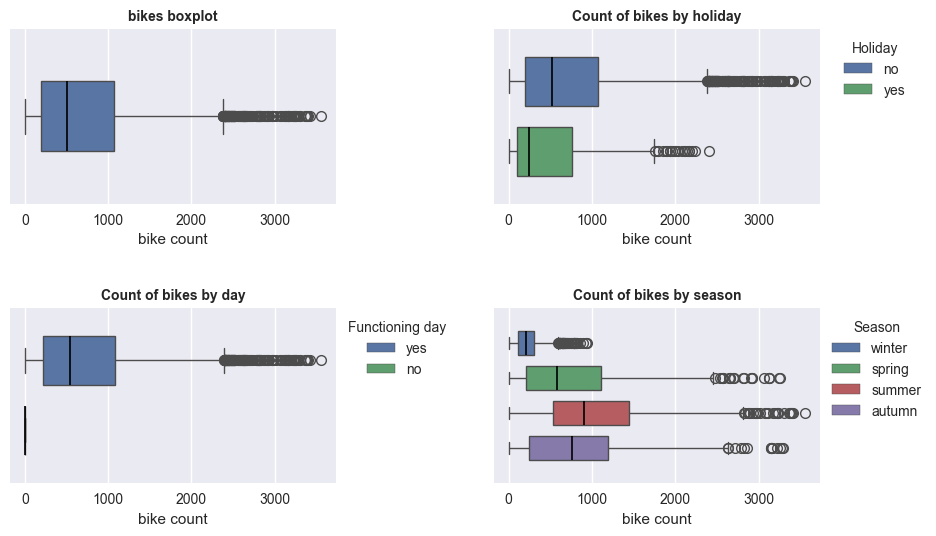

In [6]:
#Data distributions

fig_nrow, fig_ncol , nrow, ncol = tuple([10, 6, 2, 2])
plt.figure(figsize=(fig_nrow,fig_ncol))
plt.style.use('seaborn-v0_8')
axes= tuple([plt.subplot2grid((nrow,ncol), (i,j)) for i in range(nrow) for j in range(ncol)])

#Boxtplot
sns.boxplot(data=data_frame, x='rented_bike_count',
            gap=0.5, ax=axes[0], medianprops=dict(linewidth=1.2, color='k'))
axes[0].set_title('bikes boxplot', fontsize='10', fontweight='bold')
axes[0].set_xlabel('bike count')

#Holiday boxplot
sns.boxplot(data=data_frame, x='rented_bike_count',hue='holiday',
            gap=0.3, ax=axes[1], medianprops=dict(linewidth=1.2, color='k'))
axes[1].set_title('Count of bikes by holiday', fontsize='10', fontweight='bold')
axes[1].set_xlabel('bike count')
axes[1].legend(title='Holiday',bbox_to_anchor=(1.3,1))

sns.boxplot(data=data_frame, x='rented_bike_count',hue='functioning_day',
            gap=0.3, ax=axes[2], medianprops=dict(linewidth=1.2, color='k'))
axes[2].set_title('Count of bikes by day', fontsize='10', fontweight='bold')
axes[2].set_xlabel('bike count')
axes[2].legend(title='Functioning day',bbox_to_anchor=(1,1))

sns.boxplot(data=data_frame, x='rented_bike_count',hue='seasons',
            gap=0.3, ax=axes[3], medianprops=dict(linewidth=1.2, color='k'))
axes[3].set_title('Count of bikes by season', fontsize='10', fontweight='bold')
axes[3].set_xlabel('bike count')
axes[3].legend(title='Season',bbox_to_anchor=(1,1))

plt.tight_layout(pad=3)
plt.show()

# sns.countplot(data=data_frame, x='holiday',hue='holiday',gap=0.4,ax=axes[1])
# axes[1].set_xlim(-0.4,2)
# axes[1].set_title('Holidays')
# axes[1].set_xlabel('')
# axes[1].set_ylabel('Freq')
# #> seasons vs bike count
# sns.countplot(data=data_frame, x='functioning_day',hue='functioning_day',palette='hls',gap=0.4,ax=axes[2])
# axes[2].set_xlim(-0.4,2)
# axes[2].set_title('Functioning days')
# axes[2].set_xlabel('')
# axes[2].set_ylabel('Freq')
# #> functioning day vs bike count
# sns.countplot(data=data_frame, x='seasons',hue='seasons',ax=axes[3])
# plt.tight_layout(pad=2)
# axes[3].set_title('seasons')
# axes[3].set_xlim(-1,4)
# axes[3].set_xlabel('')
# axes[3].set_ylabel('Freq')
# plt.show()

#Count by dates
#> date vs bike count

#Relationships: numeric features vs bike count


#Check all numeric features outliers


##### __Weather & Time__
- `Seasons` & `time` of the year

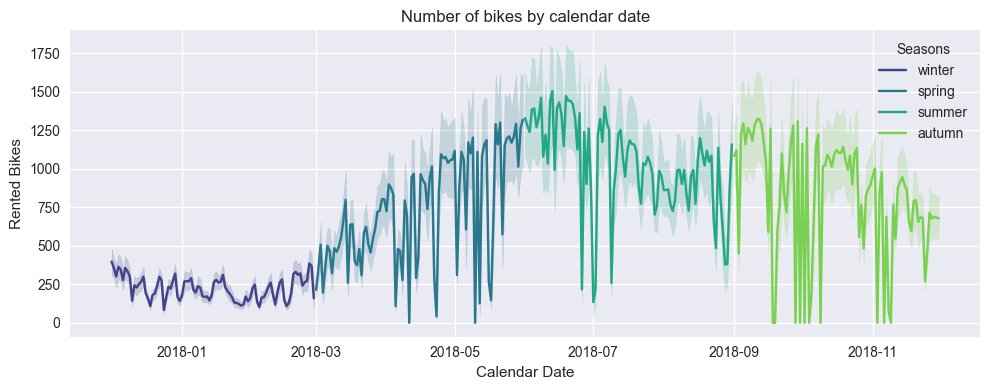

In [7]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-v0_8')
ax = sns.lineplot(data=data_frame, x='date', y='rented_bike_count',hue='seasons', palette='viridis')
ax.set_title('Number of bikes by calendar date')
ax.legend(title='Seasons')
ax.set_xlabel('Calendar Date')
ax.set_ylabel('Rented Bikes')
plt.tight_layout()
plt.show()


##### **Bike count with seasonal change**
 - `temperature`
 - `humidity`
 - `wind speed`
 - `solar radiation`
 - `rainfall`
 - `snowfall`

In [8]:
def create_weather_plots(var_name:str, interval:float|int):
    
    def create_bands(w):
        if w<interval:
            return f'<{interval}'
        return f'{int((w//interval)*interval)}-{int((w//interval)*interval+interval)}'
    
    fig_nrow, fig_ncol , nrow, ncol = tuple([10, 6, 2, 1])
    plt.figure(figsize=(fig_nrow,fig_ncol))
    axes= tuple([plt.subplot2grid((nrow,ncol), (i,j)) for i in range(nrow) for j in range(ncol)])

    tmp_data = data_frame.loc[:, [f'{var_name}','rented_bike_count','seasons']].sort_values(by=f'{var_name}', ascending=True)
    tmp_data[f'{var_name}_bands'] = tmp_data[f'{var_name}'].map(lambda w:create_bands(w))
    sns.lineplot(data=tmp_data, x=f'{var_name}', y='rented_bike_count', ax=axes[0], hue='seasons')
    name = ' '.join(var_name.split('_'))
    axes[0].set_title(f'Avg bikes count by {name}', fontweight='bold')
    
    axes[0].legend(title='Seasons',bbox_to_anchor=(1.2,1))
    axes[0].set_xlabel(f'{name.title()}')
    axes[0].set_ylabel('Rented Bikes')
    
    sns.barplot(data=tmp_data, x=f'{var_name}_bands', y='rented_bike_count',ax=axes[1], hue='seasons')
    axes[1].legend(title='Seasons',bbox_to_anchor=(1.2,1))
    axes[1].set_xlabel(f'{name.title()} Band')
    axes[1].set_ylabel('Rented Bikes')
    
    
    plt.tight_layout(pad=2)
    plt.show()
    del tmp_data

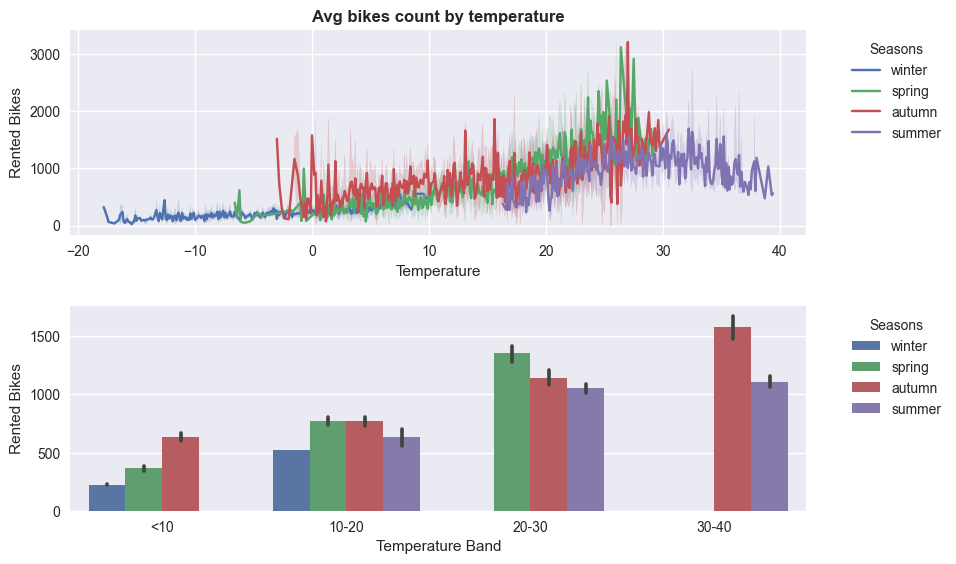

In [9]:
create_weather_plots('temperature',10)

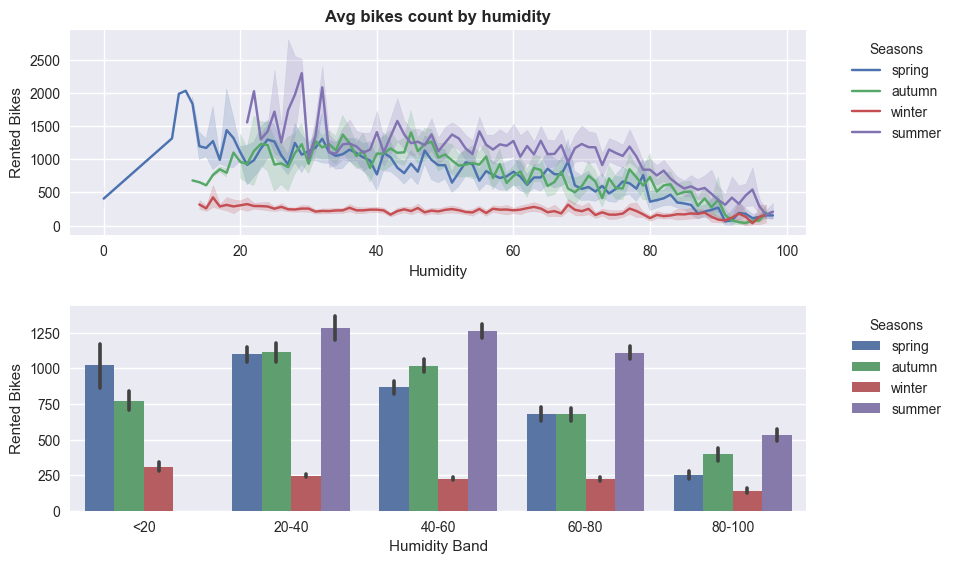

In [10]:
create_weather_plots('humidity',20)

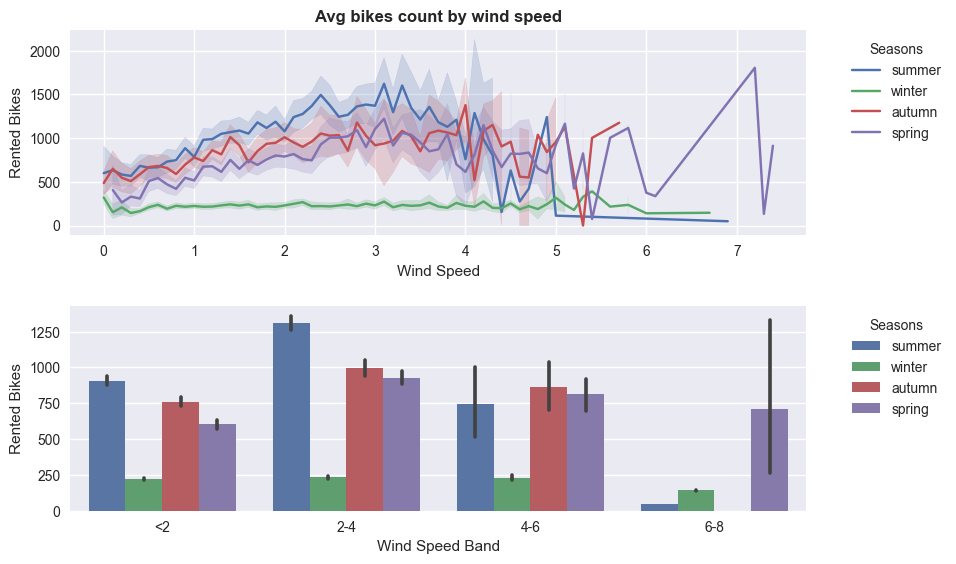

In [11]:
create_weather_plots('wind_speed',2)

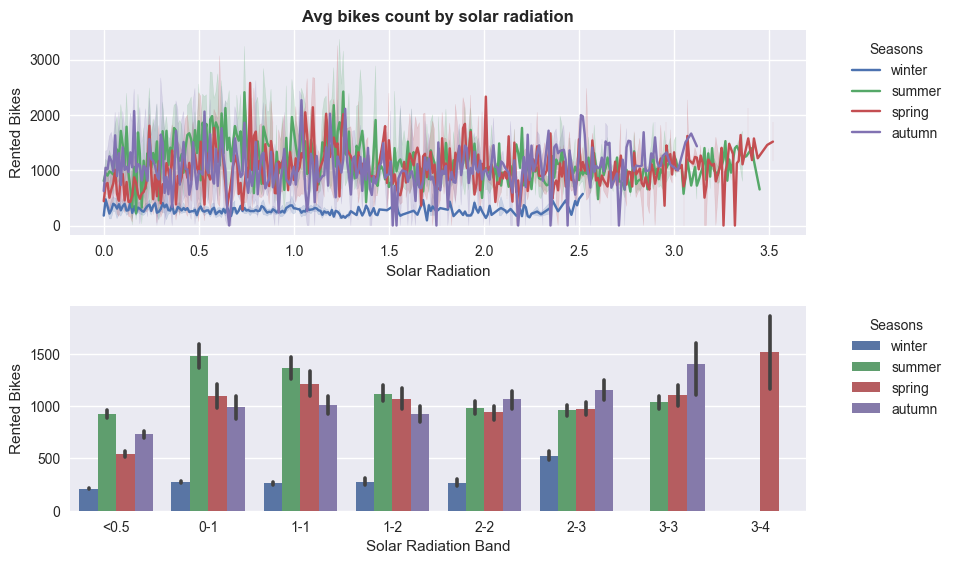

In [12]:
create_weather_plots('solar_radiation',0.5)

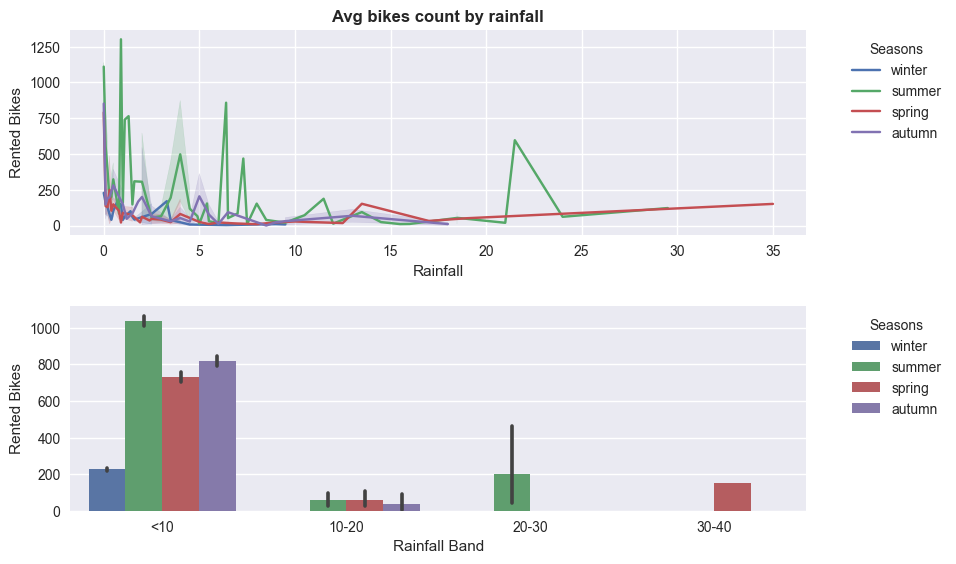

In [13]:
create_weather_plots('rainfall',10)

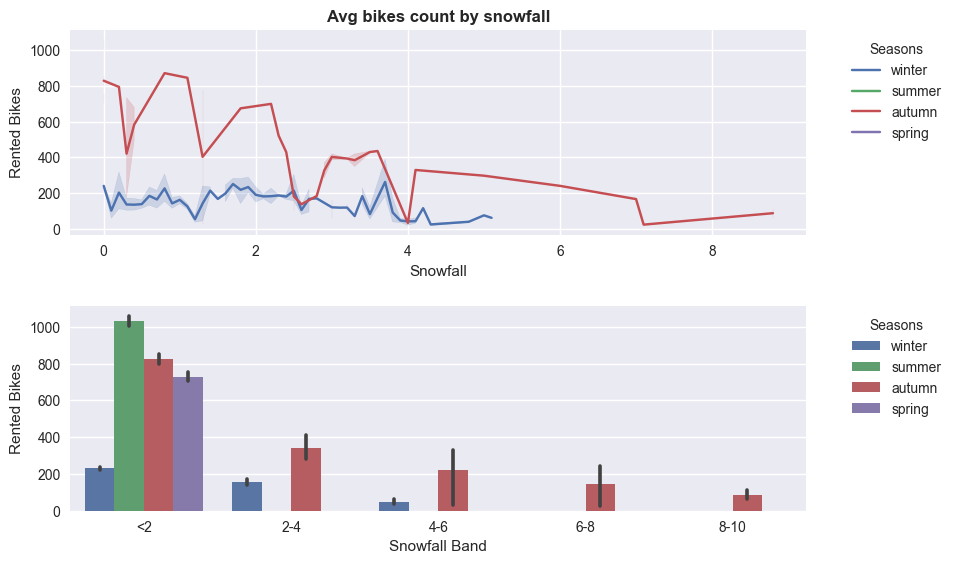

In [14]:
create_weather_plots('snowfall',2)

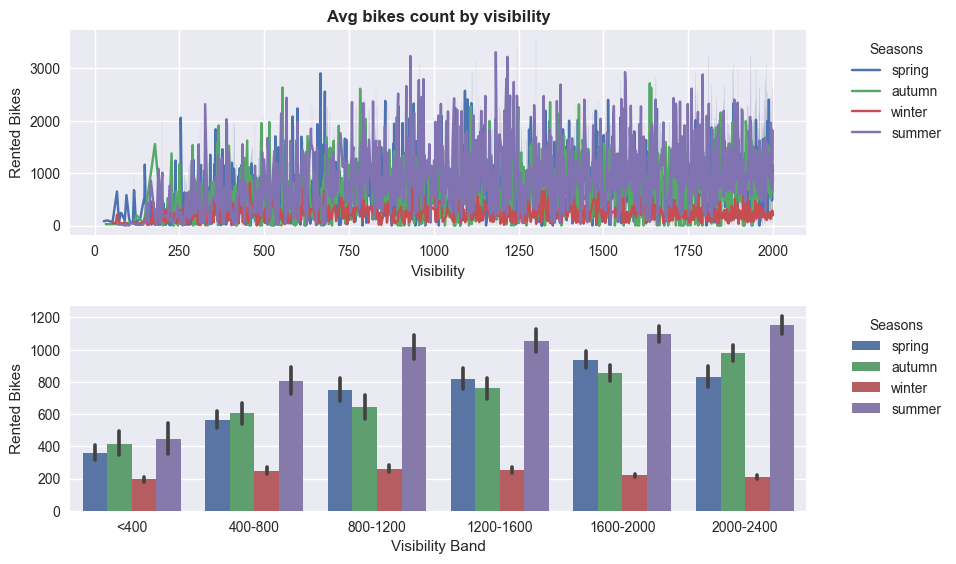

In [15]:
create_weather_plots('visibility',400)


##### **Bike count with time**
- `date`
- `day` (holiday & functional day)
- `hour`

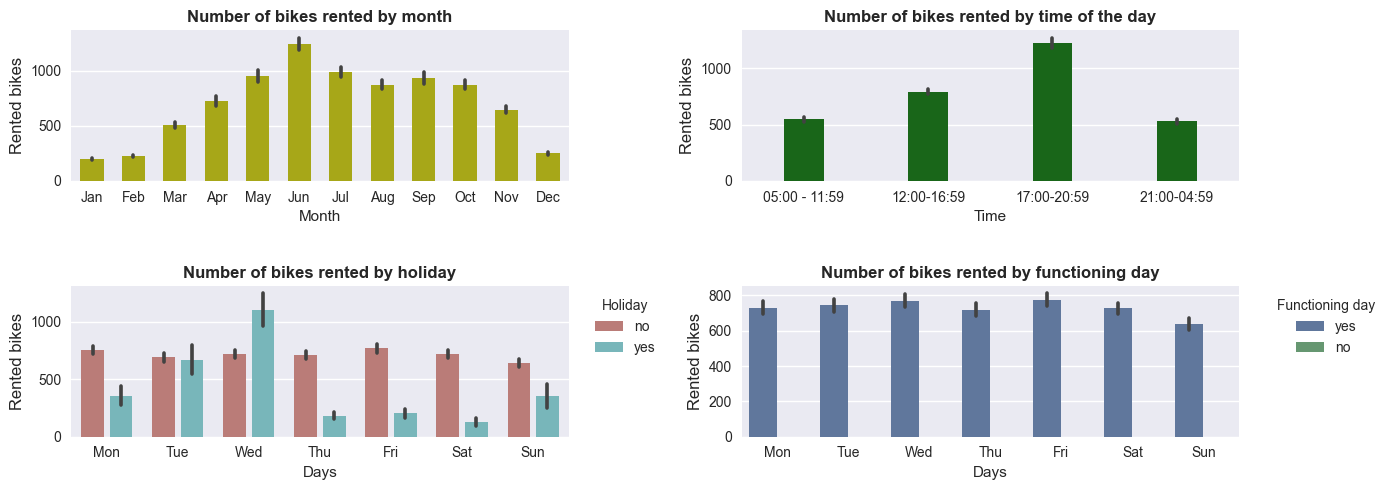

In [16]:
def categorize_time(hour):
    if hour >=5 and hour<12:
        return '05:00 - 11:59'
    elif hour>=12 and hour<17:
        return '12:00-16:59'
    elif hour>=17 and hour<21:
        return '17:00-20:59'
    elif hour>=21 or hour<5:
        return '21:00-04:59'
    
weather_data = data_frame.loc[:, ['date', 'holiday', 'functioning_day', 'hour', 'rented_bike_count']]
weather_data['month'] = weather_data['date'].dt.month_name().str.capitalize().apply(lambda m: m[:3])
weather_data['day'] = weather_data['date'].dt.day_name().str.capitalize().apply(lambda m: m[:3])
weather_data['time'] = weather_data['hour'].map(categorize_time)


nrow, ncol = 2, 2
fig = plt.figure(figsize=(14,5))
axes= tuple([plt.subplot2grid((nrow,ncol), (i,j)) for i in range(nrow) for j in range(ncol)])

order_m = ['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
order_d = ['Mon','Tue','Wed', 'Thu', 'Fri','Sat', 'Sun']
order_t = ['05:00 - 11:59','12:00-16:59','17:00-20:59', '21:00-04:59']

# sns.barplot(data=weather_data, y='rented_bike_count', x='holiday', gap=0.8, color='purple', ax=axes[0])
# sns.barplot(data=weather_data, y='rented_bike_count', x='functioning_day', gap=0.8, ax=axes[1])
sns.barplot(data=weather_data, y='rented_bike_count', x='month', gap=0.3, color='y', order=order_m, ax=axes[0])
sns.barplot(data=weather_data, y='rented_bike_count', x='time', gap=0.6,order=order_t, color='g', saturation=0.6, ax=axes[1])
sns.barplot(data=weather_data, y='rented_bike_count', x='day', hue='holiday',palette='hls',order=order_d, gap=0.2, saturation=0.5, ax=axes[2])
sns.barplot(data=weather_data, y='rented_bike_count', x='day', hue='functioning_day',order=order_d, saturation=0.6, ax=axes[3])
axes[2].legend(title='Holiday',bbox_to_anchor=(1.2,1))
axes[3].legend(title='Functioning day',bbox_to_anchor=(1.3,1))

titles = ['by month','by time of the day','by holiday','by functioning day']
xlabels = ['Month', 'Time', 'Days', 'Days']
for ax, title, xlab in list(zip(axes, titles, xlabels)):
    ax.set_xlabel(xlab)
    ax.set_ylabel('Rented bikes', fontsize='12')
    ax.set_title(f'Number of bikes rented {title}', fontweight='bold')

plt.tight_layout(h_pad=3, w_pad=2)
plt.show()

### __Model__

>#### Building model

In [17]:
#Removing outliers
Q1 = data_frame['rented_bike_count'].quantile(.25)
Q3 = data_frame['rented_bike_count'].quantile(.75)
IQR = Q3 - Q1
outlier = 1.5 * IQR
lower = Q1 - outlier
upper  =Q3 + outlier
interval = (lower, upper)

outlier_free = data_frame[~((data_frame['rented_bike_count']<lower) | (data_frame['rented_bike_count']>upper))]
outlier_free.reset_index(inplace=True, drop=True)
# outlier_free.head()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Remove date column
#Convert categorical data points to numeric
# data_values = data_frame.select_dtypes(exclude='datetime') # With outliers
# cat_columns = data_frame.select_dtypes(include='object').columns

data_values = outlier_free.select_dtypes(exclude='datetime') # Without outliers
cat_columns = outlier_free.select_dtypes(include='object').columns

selected_numeric = ['rented_bike_count', 'temperature', 'humidity', 
    'visibility', 'dew_point_temperature','wind_speed',
    'solar_radiation', 'rainfall','snowfall'
]

#Label Encoding
label_encoder = LabelEncoder()
for col in cat_columns:
    data_values[col] = label_encoder.fit_transform(data_values[col])
    
#Scaling
scaler = StandardScaler()
for col in selected_numeric:
    data_values[col] = scaler.fit_transform(data_values[col].values.reshape(-1,1))

feature, target = data_values.drop(['rented_bike_count'],axis=1).values, data_values.rented_bike_count.values


#Training and testing set split
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=43)

In [19]:
#Model pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

pipes = Pipeline([
    ('LR', LinearRegression())
    ,('Lasso', Lasso()),('SVR',SVR())
    ,('XGBoost', GradientBoostingRegressor())
    ,('Tree', DecisionTreeRegressor()),
    ('Neighbor', KNeighborsRegressor())
])

In [20]:
#Calculate Metric Scores
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

scores=[]
for name, pipe in pipes.steps:
    model=pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae=mean_absolute_error(y_test, y_pred)
    scores.append((name,r2,rmse,mae))
    
col_names = ['Model','R2', 'MSE', 'RMSE']
scores_data_frame = pd.DataFrame(scores, columns=col_names)

In [21]:
#Model Evaluation(Before outlier removal)
scores_data_frame.sort_values(['R2'],ascending=False)

,Model,R2,MSE,RMSE
3,XGBoost,0.841263,0.391550,0.266920
5,Neighbor,0.767109,0.474269,0.296936
4,Tree,0.738452,0.502603,0.284737
2,SVR,0.673781,0.561310,0.361016
0,LR,0.571584,0.643253,0.490071
1,Lasso,0.127154,0.918158,0.759065


In [22]:
#Model Evaluation
scores_data_frame.sort_values(['R2'],ascending=False)

,Model,R2,MSE,RMSE
3,XGBoost,0.841263,0.391550,0.266920
5,Neighbor,0.767109,0.474269,0.296936
4,Tree,0.738452,0.502603,0.284737
2,SVR,0.673781,0.561310,0.361016
0,LR,0.571584,0.643253,0.490071
1,Lasso,0.127154,0.918158,0.759065


>####  _Feature Selection_

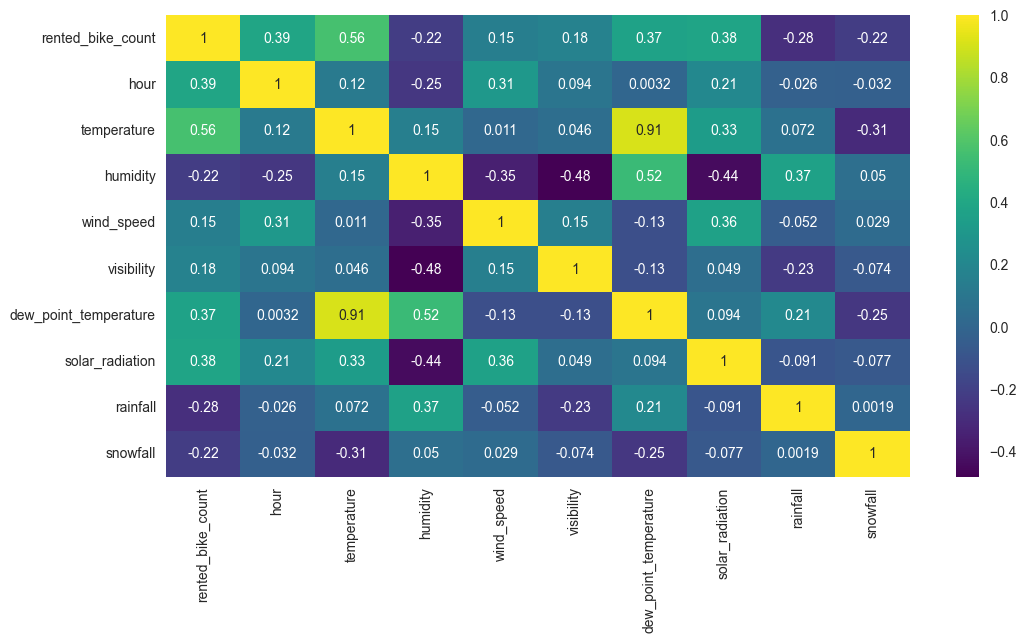

In [23]:
#correlation feature importance
corr_data = data_frame.select_dtypes(include='number').corr(method='spearman')
fig, axes = plt.subplots(1,1, figsize=(12,6))
sns.heatmap(corr_data, annot=True, ax=axes, cmap='viridis')
plt.show()

In [25]:
# corr_data.index

>#### Tune-Hyperameters

>#### Better Model

>#### Discussion